Checking the GPU Type

In [1]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sat Aug 13 11:31:01 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

Checking RAM Size

In [2]:
from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Your runtime has 13.6 gigabytes of available RAM

Not using a high-RAM runtime


In [3]:
! pip install -q datasets transformers

     |████████████████████████████████| 365 kB 5.0 MB/s 
     |████████████████████████████████| 4.7 MB 62.3 MB/s 
     |████████████████████████████████| 101 kB 13.4 MB/s 
     |████████████████████████████████| 115 kB 77.5 MB/s 
     |████████████████████████████████| 141 kB 75.1 MB/s 
     |████████████████████████████████| 212 kB 58.7 MB/s 
     |████████████████████████████████| 596 kB 63.1 MB/s 
     |████████████████████████████████| 127 kB 54.6 MB/s 
     |████████████████████████████████| 6.6 MB 50.6 MB/s 


In [4]:
from huggingface_hub import notebook_login

notebook_login()

Login successful
Your token has been saved to /root/.huggingface/token
Authenticated through git-credential store but this isn't the helper defined on your machine.
You might have to re-authenticate when pushing to the Hugging Face Hub. Run the following command in your terminal in case you want to set this credential helper as the default

git config --global credential.helper store


In [5]:
!apt install git-lfs

Reading package lists... Done
Building dependency tree       
Reading state information... Done
git-lfs is already the newest version (2.3.4-1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 19 not upgraded.


In [6]:
import transformers

print(transformers.__version__)

4.21.1


Fine-tuning begins

In [7]:
model_checkpoint = "nlptown/bert-base-multilingual-uncased-sentiment"
#model_checkpoint = "distilbert-base-uncased"
#model_checkpoint = "bert-base-cased"
batch_size = 16

Loading the datasets

In [8]:
from datasets import load_dataset, load_metric, list_metrics

In [9]:
actual_task = "mnli"
metric = load_metric('glue', actual_task)

Mounting the Drive

In [10]:
from google.colab import drive
drive.mount('/content/drive')

% cd /content/drive/MyDrive/datasets

Mounted at /content/drive
/content/drive/MyDrive/datasets


Reading in the Amazon Product Review datasets

In [11]:
import datasets
import random
import pandas as pd
import numpy as np

path = ['amazon_reviews_us_Apparel_v1_00.tsv',
        'amazon_reviews_us_Automotive_v1_00.tsv',
        'amazon_reviews_us_Baby_v1_00.tsv',
        'amazon_reviews_us_Beauty_v1_00.tsv',
        'amazon_reviews_us_Books_v1_02.tsv',
        'amazon_reviews_us_Camera_v1_00.tsv',
        'amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv',
        'amazon_reviews_us_Digital_Software_v1_00.tsv',
        'amazon_reviews_us_Digital_Video_Games_v1_00.tsv',
        'amazon_reviews_us_Electronics_v1_00.tsv',
        'amazon_reviews_us_Furniture_v1_00.tsv',
        'amazon_reviews_us_Grocery_v1_00.tsv',
        'amazon_reviews_us_Health_Personal_Care_v1_00.tsv',
        'amazon_reviews_us_Mobile_Electronics_v1_00.tsv',
        'amazon_reviews_us_Outdoors_v1_00.tsv',
        'amazon_reviews_us_Personal_Care_Appliances_v1_00.tsv',
        'amazon_reviews_us_Sports_v1_00.tsv',
        'amazon_reviews_us_Tools_v1_00.tsv']

li = []
num_each = 2000

for filename in path:
    df = pd.read_csv(filename, index_col=None, header=0, sep="\t", error_bad_lines=False, warn_bad_lines=False)
    df = df.sample(n=num_each)
    li.append(df)
    print(f"Dataset loaded successfully : {filename} ")

product = pd.concat(li, axis=0, ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


Dataset loaded successfully : amazon_reviews_us_Apparel_v1_00.tsv 


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


Dataset loaded successfully : amazon_reviews_us_Automotive_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Baby_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Beauty_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Books_v1_02.tsv 
Dataset loaded successfully : amazon_reviews_us_Camera_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Digital_Ebook_Purchase_v1_01.tsv 
Dataset loaded successfully : amazon_reviews_us_Digital_Software_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Digital_Video_Games_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Electronics_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Furniture_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Grocery_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Health_Personal_Care_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Mobile_Electronics_v1_00.tsv 
Dataset loaded successfully : amazon_reviews_us_Outdoors_v1_00.tsv 

In [12]:
product

,marketplace,customer_id,review_id,product_id,product_parent,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date
0,US,9968361,R2510HNFB9R3UM,B00TXP8YTW,359902029,Oops Outlet Women's Sleeveless Waist Lace Inse...,Apparel,2.0,2.0,2.0,N,Y,Beautiful until you put it on cut funny and wa...,Beautiful until you put it on cut funny and w...,2015-06-05
1,US,13103069,R24NCTF8YMAI24,B011I9ZOPC,992067172,"100% Cotton Basic Ribbed Tank Tops, Printed Ta...",Apparel,5.0,0.0,0.0,N,N,Touch Me 100% Cotton Basic Ribbed Layering Tank.,This is a really nice tank top!<br /><br />The...,2015-08-25
2,US,44672048,RC1BCPB4HK5MD,B003IC7V9U,320315270,elope Wenda Costume,Apparel,5.0,0.0,0.0,N,Y,Just right for me,I read some reviews about how this item is too...,2014-10-30
3,US,23405326,R7F5NU0P49O63,B008HTOTP8,668371371,7 For All Mankind Women's Highwaist Skinny Jea...,Apparel,4.0,0.0,0.0,N,Y,"Thick, but cute",The material seems a bit thicker than other je...,2013-09-05
4,US,35001877,R33TZ2R9WZ69UM,B00B01HD3A,209172113,Ripple Junction Doctor Who Tardis Union Jack G...,Apparel,4.0,0.0,0.0,N,Y,Four Stars,Son loves this shirt.,2015-06-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35995,US,15409484,R36H50PIR6W5G9,B0037MIFUA,131370786,"Shelf Support, Bracket-Style, Nickel, 1/4"" (25)",Tools,4,0.0,0.0,N,Y,shelf and support brackets,Worked well--------strong and sturdy. Just wh...,2013-09-18
35996,US,11479656,R1VYUHZSGBOCRQ,B00E4J44BE,23118073,Leegoal(TM) Unisex Vintage Steampunk Goggles S...,Tools,2,0.0,0.0,N,Y,You get what you paid for,The goggles arrived very quickly. Other than t...,2015-04-27
35997,US,43051057,R3D6HNXZOJYY85,B004QO9OWG,888049305,Snap-On 870113 18-Inch Rolling Tool Bag,Tools,4,1.0,1.0,N,Y,skeptical at first,I am satisfied with this tool bag. I was a lit...,2014-08-19
35998,US,52906306,R3G88EIHSFADMZ,B00LMY835M,421619535,LEMONBEST New LED Home Security TV Light Theft...,Tools,5,4.0,4.0,N,Y,Way better than just leaving the radio on!,I have purchased five of these things (four as...,2015-01-11


In [13]:
product['review'] = product['review_headline'] + ". " + product['review_body']
product = product[['review', 'star_rating']]
product = product.rename(columns={'review': 'text', 'star_rating': 'label'})
alled = product

Splitting the data into training. validation, testing and downsampling it for training

In [14]:
from sklearn.model_selection import train_test_split

frac_train = 0.9
frac_test = 0.8

train_all, test = train_test_split(alled, train_size=frac_train, shuffle=True)
train, dev = train_test_split(train_all, train_size=frac_test, shuffle=True)

train = train.dropna()
dev = dev.dropna()
test = test.dropna()
print('Before training shape:',train.shape)
print('Before dev shape:',dev.shape)
print('Before test shape:',test.shape)

'''
train = train.sample(n=train_count)
dev = dev.sample(n=dev_count)
test = test.sample(n=test_count)

print('After training shape:',train.shape)
print('After dev shape:',dev.shape)
print('After test shape:',test.shape)
'''

train.reset_index(drop=True, inplace=True)
dev.reset_index(drop=True, inplace=True)
test.reset_index(drop=True, inplace=True)

train = train.astype({'label': int})
dev = dev.astype({'label': int})
test = test.astype({'label': int})

train['label'] = train['label'] - 1
dev['label'] = dev['label'] - 1
test['label'] = test['label'] - 1

# Save each data
train.to_csv("train.csv", index=False)
dev.to_csv("dev.csv", index=False)
test.to_csv("test.csv", index=False)

Before training shape: (25919, 2)
Before dev shape: (6479, 2)
Before test shape: (3600, 2)


load the downsampled dataset for training, validation and testing 

In [15]:
dataset = load_dataset("csv", data_files={'train': 'train.csv', 'validation': 'dev.csv', 'test': 'test.csv'})

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

0 tables [00:00, ? tables/s]

Dataset csv downloaded and prepared to /root/.cache/huggingface/datasets/csv/default-b9bdaa03df66cbd5/0.0.0/652c3096f041ee27b04d2232d41f10547a8fecda3e284a79a0ec4053c916ef7a. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]

In [17]:
dataset["train"][50]

{'label': 4,
 'text': "Excellent in Comparison. I replaced a Tivoli Audio Stereo/Woofer combo with this BA Duo-i primarily because I like the ipod dock and the Tivoli took up too much room.  I have a BA Receptor radio that has proven itself over the past couple years.  I have also had a similar system from Cambridge SoundWorks.  The Boston Acoustics Duo-i has not disappointed me.  The sound it great, it picks up stations well and the adjustability and control of the unit is well thought out.  It has now replaced my Receptor Radio on the bed stand and the Tivoli with it's ipod adaptor on the bookcase.  I can't think of any negatives based on comparisons to Tivoli and Cambridge systems.  It is well though out, excellent sound,  Above average control features and a fairly small footprint."}

Preprocessing 

In [18]:
from transformers import AutoTokenizer

print(model_checkpoint)
tokenizer = AutoTokenizer.from_pretrained(model_checkpoint, use_fast=True)

nlptown/bert-base-multilingual-uncased-sentiment


In [19]:
def preprocess_function(examples):
    return tokenizer(examples["text"], padding="max_length", truncation=True)

In [20]:
encoded_dataset = dataset.map(preprocess_function, batched=True)

  0%|          | 0/26 [00:00<?, ?ba/s]

  0%|          | 0/7 [00:00<?, ?ba/s]

  0%|          | 0/4 [00:00<?, ?ba/s]

Fine-tuning the model

In [21]:
from transformers import AutoModelForSequenceClassification, TrainingArguments, Trainer

print(model_checkpoint)
num_labels = 5
model = AutoModelForSequenceClassification.from_pretrained(model_checkpoint, num_labels=num_labels)

nlptown/bert-base-multilingual-uncased-sentiment


In [22]:
metric_name = "accuracy"
print(metric_name)
model_name = model_checkpoint.split("/")[-1]
print(model_name)

args = TrainingArguments(
    f"{model_name}-finetuned-{actual_task}",
    evaluation_strategy = "epoch",
    save_strategy = "epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    num_train_epochs=2,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model=metric_name,
    push_to_hub=True,
)

accuracy
bert-base-multilingual-uncased-sentiment


Defining the trainer

In [23]:
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [24]:
trainer = Trainer(
    model,
    args,
    train_dataset=encoded_dataset["train"],
    eval_dataset=encoded_dataset["validation"],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

/content/drive/MyDrive/datasets/bert-base-multilingual-uncased-sentiment-finetuned-mnli is already a clone of https://huggingface.co/ak630/bert-base-multilingual-uncased-sentiment-finetuned-mnli. Make sure you pull the latest changes with `repo.git_pull()`.


Training begins!!!

In [25]:
trainer.train()

The following columns in the training set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
/usr/local/lib/python3.7/dist-packages/transformers/optimization.py:310: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  FutureWarning,
***** Running training *****
  Num examples = 25919
  Num Epochs = 2
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 3240


Epoch,Training Loss,Validation Loss,Accuracy
1,0.575500,0.537882,0.783300
2,0.446500,0.562986,0.779750


The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 6479
  Batch size = 16
Saving model checkpoint to bert-base-multilingual-uncased-sentiment-finetuned-mnli/checkpoint-1620
Configuration saved in bert-base-multilingual-uncased-sentiment-finetuned-mnli/checkpoint-1620/config.json
Model weights saved in bert-base-multilingual-uncased-sentiment-finetuned-mnli/checkpoint-1620/pytorch_model.bin
tokenizer config file saved in bert-base-multilingual-uncased-sentiment-finetuned-mnli/checkpoint-1620/tokenizer_config.json
Special tokens file saved in bert-base-multilingual-uncased-sentiment-finetuned-mnli/checkpoint-1620/special_tokens_map.json
tokenizer config file saved in bert-base-multilingual-uncased-sentiment-finetuned-mnli/tokenizer_confi

TrainOutput(global_step=3240, training_loss=0.518150786411615, metrics={'train_runtime': 5502.5555, 'train_samples_per_second': 9.421, 'train_steps_per_second': 0.589, 'total_flos': 1.3639518269048832e+16, 'train_loss': 0.518150786411615, 'epoch': 2.0})

Check whether model was trained properly or not

In [26]:
trainer.evaluate()

The following columns in the evaluation set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Evaluation *****
  Num examples = 6479
  Batch size = 16


{'epoch': 2.0,
 'eval_accuracy': 0.7832998919586356,
 'eval_loss': 0.5378823280334473,
 'eval_runtime': 223.4942,
 'eval_samples_per_second': 28.99,
 'eval_steps_per_second': 1.812}

Evaluate the trained model on our held-out test dataset

In [27]:
predictions = trainer.predict(encoded_dataset["test"])
print(predictions.predictions.shape, predictions.label_ids.shape)

preds = np.argmax(predictions.predictions, axis=-1)
metric.compute(predictions=preds, references=predictions.label_ids)

The following columns in the test set don't have a corresponding argument in `BertForSequenceClassification.forward` and have been ignored: text. If text are not expected by `BertForSequenceClassification.forward`,  you can safely ignore this message.
***** Running Prediction *****
  Num examples = 3600
  Batch size = 16


(3600, 5) (3600,)


{'accuracy': 0.8005555555555556}

Compute F1-score on the test dataset

In [28]:
from sklearn.metrics import f1_score

f1_score(y_true=predictions.label_ids, y_pred=preds, average='weighted')


0.7892392075465517

Viewing the Confusion Matrix

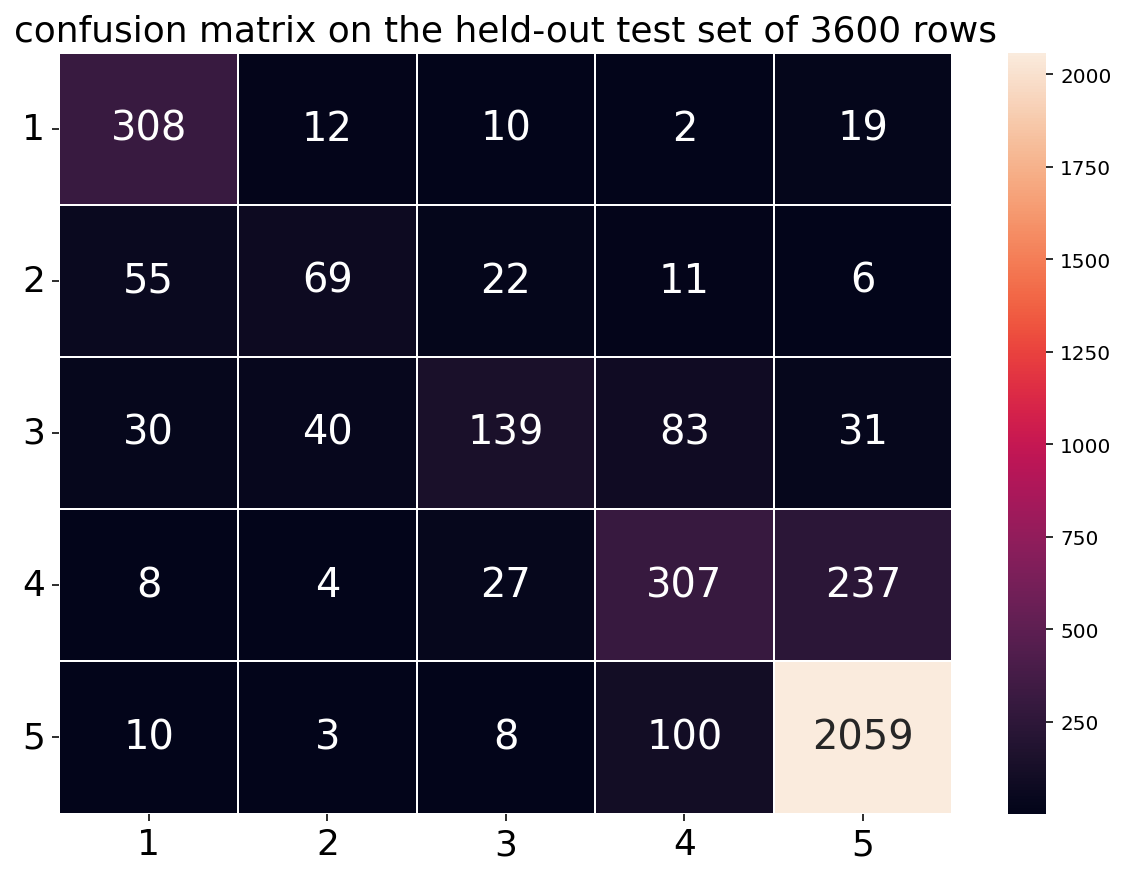

In [29]:
from sklearn.metrics import confusion_matrix
import seaborn as sn
import matplotlib.pyplot as plt
%config InlineBackend.figure_format = 'retina'

array = confusion_matrix(y_true=predictions.label_ids, y_pred=preds)

df_cm = pd.DataFrame(array, index = [i for i in [1,2,3,4,5]],
                  columns = [i for i in [1,2,3,4,5]])

plt.figure(figsize = (10,7))
ax = plt.axes()
g = sn.heatmap(df_cm, annot=True, fmt="d", linewidths=.5, ax=ax, annot_kws={"size": 20});
g.set_yticklabels(g.get_yticklabels(), rotation = 0, fontsize = 18)
g.set_xticklabels(g.get_xticklabels(), rotation = 0, fontsize = 18)
ax.set_title(f'confusion matrix on the held-out test set of {len(preds)} rows', fontsize=18)
plt.show()